# **1. DATA UNDERSTANDING**

### Load the insurance dataset


In [1]:
import pandas as pd
# Read the parquet file
try:
    df = pd.read_parquet('../data/raw/insurance_data.parquet')
except FileNotFoundError:
    print("Error: The parquet file was not found. Please check if the file exists at '../data/raw/insurance_data.parquet'")
    raise
except Exception as e:
    print(f"Unexpected error reading parquet file: {e}")
    raise



### Shape of the dataset

In [2]:
# Print shape of dataset
print("Shape of dataset:", df.shape)


Shape of dataset: (1000098, 52)


### Column data types

In [3]:
# Print column data types
print("\nColumn data types:")
print(df.dtypes)


Column data types:
UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth             object
IsVATRegistered                bool
Citizenship                  object
LegalType                    object
Title                        object
Language                     object
Bank                         object
AccountType                  object
MaritalStatus                object
Gender                       object
Country                      object
Province                     object
PostalCode                    int64
MainCrestaZone               object
SubCrestaZone                object
ItemType                     object
mmcode                      float64
VehicleType                  object
RegistrationYear              int64
make                         object
Model                        object
Cylinders                   float64
cubiccapacity               float64
kilowatts                   float64
bodytype                     object
NumberOf

### Sample rows (head/tail)

In [4]:
# Print sample rows (head)
print("\nFirst 5 rows:")
print(df.head())


First 5 rows:
   UnderwrittenCoverID  PolicyID     TransactionMonth  IsVATRegistered  \
0               145249     12827  2015-03-01 00:00:00             True   
1               145249     12827  2015-05-01 00:00:00             True   
2               145249     12827  2015-07-01 00:00:00             True   
3               145255     12827  2015-05-01 00:00:00             True   
4               145255     12827  2015-07-01 00:00:00             True   

  Citizenship          LegalType Title Language                 Bank  \
0              Close Corporation    Mr  English  First National Bank   
1              Close Corporation    Mr  English  First National Bank   
2              Close Corporation    Mr  English  First National Bank   
3              Close Corporation    Mr  English  First National Bank   
4              Close Corporation    Mr  English  First National Bank   

       AccountType  ...                    ExcessSelected CoverCategory  \
0  Current account  ...         

### Unique value counts for categorical fields

In [5]:
# Print unique value counts for categorical fields
print("\nUnique value counts for categorical fields:")
categorical_columns = df.select_dtypes(include=['object', 'bool']).columns
for col in categorical_columns:
    print(f"\n{col}:")
    print(df[col].value_counts())


Unique value counts for categorical fields:

TransactionMonth:
TransactionMonth
2015-08-01 00:00:00    106747
2015-07-01 00:00:00    104143
2015-06-01 00:00:00    102594
2015-05-01 00:00:00     99898
2015-04-01 00:00:00     96563
2015-03-01 00:00:00     92015
2015-02-01 00:00:00     83198
2015-01-01 00:00:00     71576
2014-12-01 00:00:00     62457
2014-11-01 00:00:00     48248
2014-10-01 00:00:00     33820
2014-09-01 00:00:00     25990
2014-08-01 00:00:00     19626
2014-07-01 00:00:00     14907
2014-06-01 00:00:00     11822
2014-05-01 00:00:00      9484
2014-04-01 00:00:00      6919
2014-03-01 00:00:00      3466
2014-02-01 00:00:00      2062
2014-01-01 00:00:00      1827
2013-12-01 00:00:00      1495
2013-11-01 00:00:00      1196
2013-10-01 00:00:00        45
Name: count, dtype: int64

IsVATRegistered:
IsVATRegistered
False    995075
True       5023
Name: count, dtype: int64

Citizenship:
Citizenship
      895210
ZA    103721
ZW       936
AF       231
Name: count, dtype: int64

LegalT

----

# **2. EXPLORATORY DATA ANALYSIS**

## **A. Portfolio-Level Metrics**

### Loss Ratio = TotalClaims / TotalPremium

In [6]:
# Calculate portfolio-level metrics
print("\nPortfolio-Level Metrics:")

# Total Premium
total_premium = df['TotalPremium'].sum()
print(f"\nTotal Premium: R{total_premium:,.2f}")

# Total Claims
total_claims = df['TotalClaims'].sum()
print(f"Total Claims: R{total_claims:,.2f}")

# Loss Ratio
loss_ratio = (total_claims / total_premium) * 100
print(f"Loss Ratio: {loss_ratio:.2f}%")

# Number of Policies
num_policies = df['PolicyID'].nunique()
print(f"Number of Unique Policies: {num_policies:,}")

# Average Premium per Policy
avg_premium = total_premium / num_policies
print(f"Average Premium per Policy: R{avg_premium:,.2f}")

# Average Claims per Policy
avg_claims = total_claims / num_policies
print(f"Average Claims per Policy: R{avg_claims:,.2f}")

# Create a summary DataFrame
portfolio_metrics = pd.DataFrame({
    'Metric': ['Total Premium', 'Total Claims', 'Loss Ratio', 'Number of Policies', 
               'Average Premium per Policy', 'Average Claims per Policy'],
    'Value': [f'R{total_premium:,.2f}', f'R{total_claims:,.2f}', f'{loss_ratio:.2f}%',
              f'{num_policies:,}', f'R{avg_premium:,.2f}', f'R{avg_claims:,.2f}']
})

display(portfolio_metrics)



Portfolio-Level Metrics:

Total Premium: R61,911,562.70
Total Claims: R64,867,546.17
Loss Ratio: 104.77%
Number of Unique Policies: 7,000
Average Premium per Policy: R8,844.51
Average Claims per Policy: R9,266.79


,Metric,Value
0,Total Premium,"R61,911,562.70"
1,Total Claims,"R64,867,546.17"
2,Loss Ratio,104.77%
3,Number of Policies,"7,000"
4,Average Premium per Policy,"R8,844.51"
5,Average Claims per Policy,"R9,266.79"


### Key Insights from Portfolio Analysis:

 **1. Financial Performance**
 - The portfolio shows a concerning loss ratio of 104.77%, indicating that claims exceed premiums
 - Total claims (R64.87M) are higher than total premiums (R61.91M)
 - This suggests the portfolio is currently operating at a loss

 **2. Policy Distribution**
 - The portfolio contains 7,000 unique policies
 - Average premium per policy is R8,844.51
 - Average claims per policy is R9,266.79
 - The higher average claims compared to premiums reinforces the loss ratio findings

 **3. Risk Assessment**
 - The negative premium-to-claims ratio indicates potential underwriting issues
 - Premiums may need to be adjusted to better reflect the risk profile
 - Further analysis of high-claim policies could help identify risk factors

 **4. Business Implications**
 - Immediate attention needed to address the loss-making position
 - Consider premium adjustments or risk selection criteria review
 - May need to implement stricter underwriting guidelines



----


=== Analysis by Province ===


,TotalPremium,TotalClaims,PolicyID,LossRatio,AvgPremium,AvgClaims
Province,,,,,,
Eastern Cape,2140103.83,1356426.66,319,63.38,6708.79,4252.12
Free State,521363.24,354922.27,54,68.08,9654.87,6572.63
Gauteng,24053774.58,29394148.48,2578,122.20,9330.40,11401.92
KwaZulu-Natal,13209079.81,14301382.45,1370,108.27,9641.66,10438.97
Limpopo,1537324.50,1016476.71,181,66.12,8493.51,5615.89
Mpumalanga,2836291.94,2044675.36,382,72.09,7424.85,5352.55
North West,7490508.18,5920250.00,1117,79.04,6705.92,5300.13
Northern Cape,316558.07,89490.51,55,28.27,5755.60,1627.10
Western Cape,9806558.53,10389773.74,947,105.95,10355.39,10971.25



=== Analysis by Vehicle Type ===


,TotalPremium,TotalClaims,PolicyID,LossRatio,AvgPremium,AvgClaims
VehicleType,,,,,,
Bus,58244.74,7996.54,6,13.73,9707.46,1332.76
Heavy Commercial,460947.86,750474.58,72,162.81,6402.05,10423.26
Light Commercial,260497.52,60452.50,39,23.21,6679.42,1550.06
Medium Commercial,3922745.55,4119866.90,457,105.03,8583.69,9015.03
Passenger Vehicle,56642016.58,59372069.68,6695,104.82,8460.35,8868.12



=== Analysis by Gender ===


,TotalPremium,TotalClaims,PolicyID,LossRatio,AvgPremium,AvgClaims
Gender,,,,,,
Female,304480.55,250246.10,35,82.19,8699.44,7149.89
Male,1580142.80,1396703.92,232,88.39,6810.96,6020.28
Not specified,59202752.22,62714103.07,6601,105.93,8968.76,9500.70


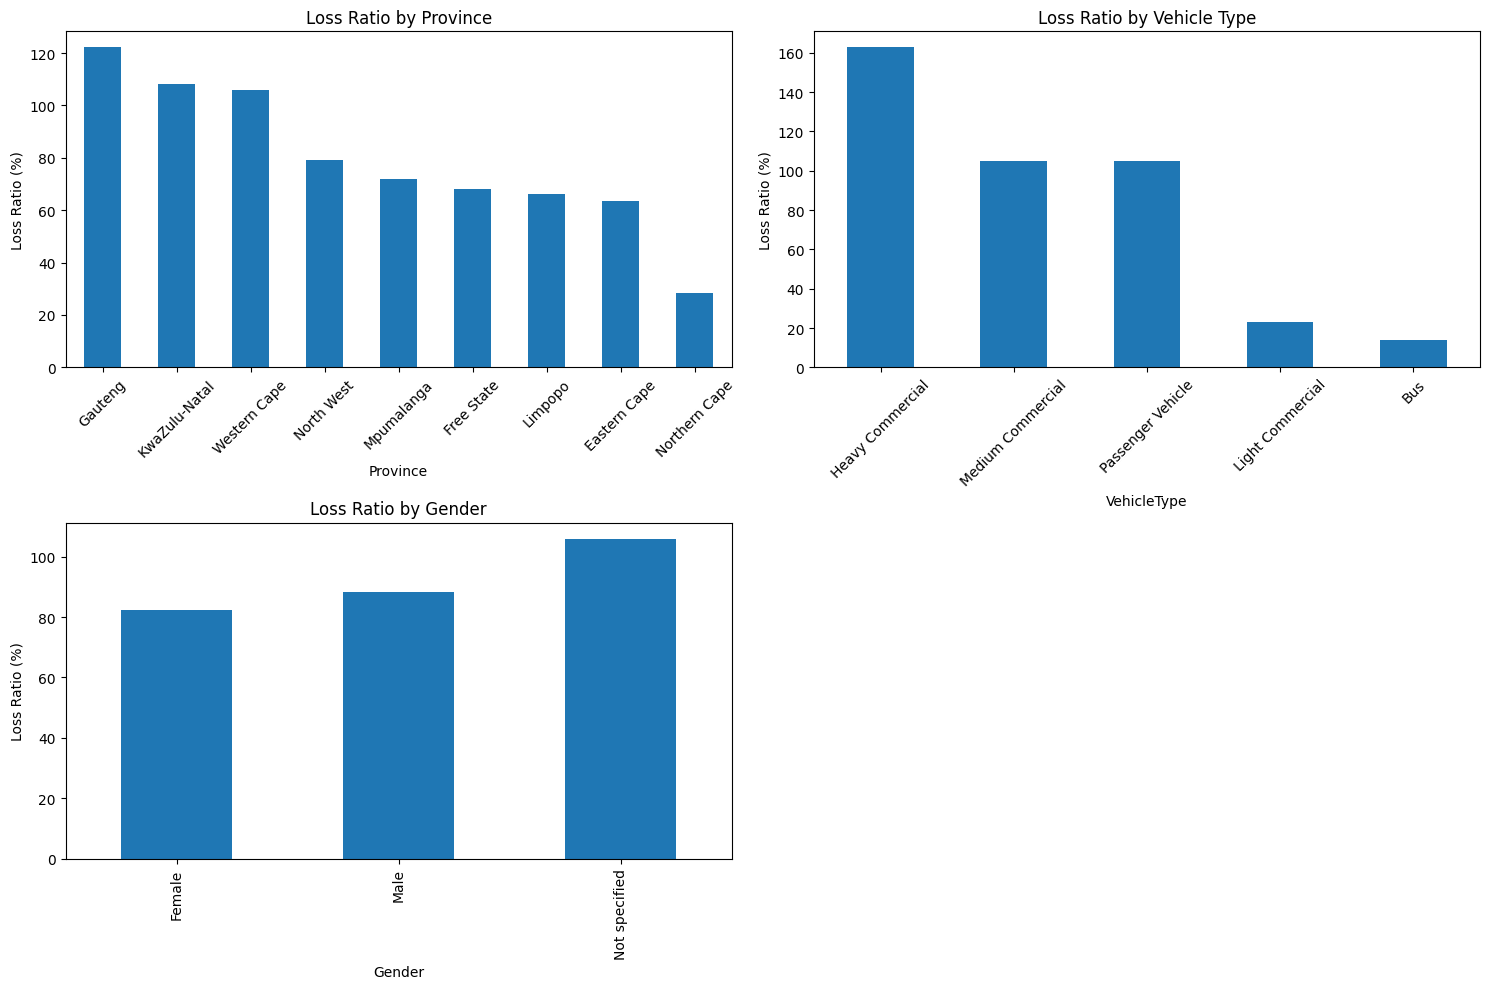

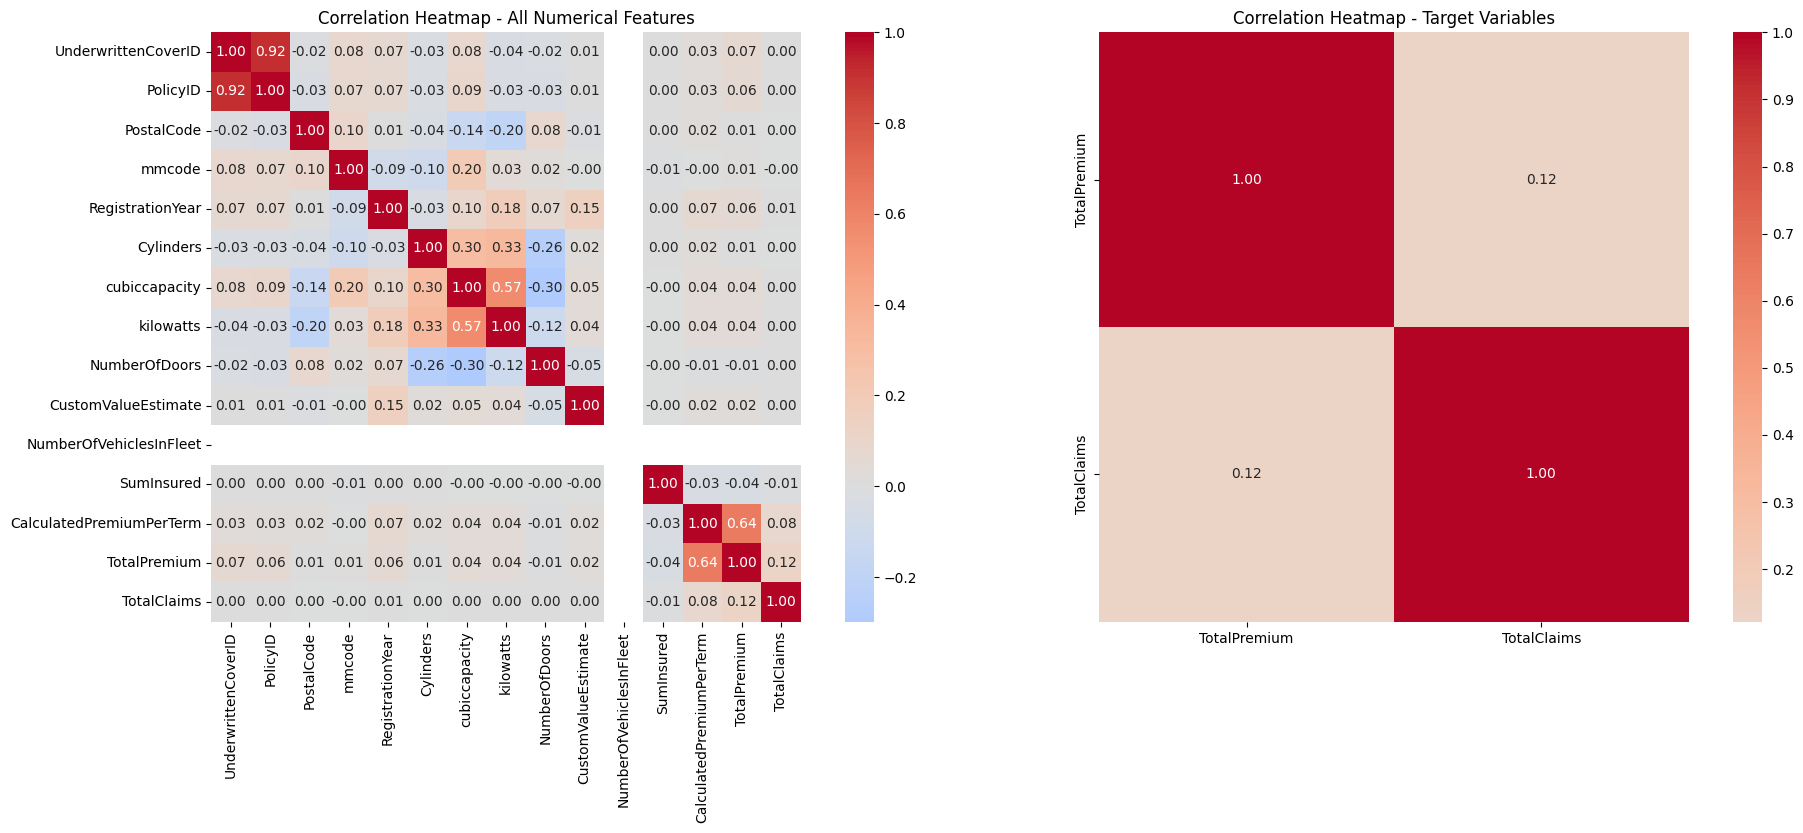


Top correlations with TotalPremium:
CalculatedPremiumPerTerm    0.635987
TotalClaims                 0.121588
UnderwrittenCoverID         0.065413
PolicyID                    0.059572
RegistrationYear            0.058666
Name: TotalPremium, dtype: float64

Top correlations with TotalClaims:
TotalPremium                0.121588
CalculatedPremiumPerTerm    0.079787
RegistrationYear            0.005197
kilowatts                   0.003099
UnderwrittenCoverID         0.003011
Name: TotalClaims, dtype: float64


In [7]:
# Group and analyze by Province, VehicleType, and Gender
print("\n=== Analysis by Province ===")
province_metrics = df.groupby('Province').agg({
    'TotalPremium': 'sum',
    'TotalClaims': 'sum',
    'PolicyID': 'nunique'
}).round(2)

province_metrics['LossRatio'] = (province_metrics['TotalClaims'] / province_metrics['TotalPremium'] * 100).round(2)
province_metrics['AvgPremium'] = (province_metrics['TotalPremium'] / province_metrics['PolicyID']).round(2)
province_metrics['AvgClaims'] = (province_metrics['TotalClaims'] / province_metrics['PolicyID']).round(2)

display(province_metrics)

print("\n=== Analysis by Vehicle Type ===")
vehicle_metrics = df.groupby('VehicleType').agg({
    'TotalPremium': 'sum',
    'TotalClaims': 'sum',
    'PolicyID': 'nunique'
}).round(2)

vehicle_metrics['LossRatio'] = (vehicle_metrics['TotalClaims'] / vehicle_metrics['TotalPremium'] * 100).round(2)
vehicle_metrics['AvgPremium'] = (vehicle_metrics['TotalPremium'] / vehicle_metrics['PolicyID']).round(2)
vehicle_metrics['AvgClaims'] = (vehicle_metrics['TotalClaims'] / vehicle_metrics['PolicyID']).round(2)

display(vehicle_metrics)

print("\n=== Analysis by Gender ===")
gender_metrics = df.groupby('Gender').agg({
    'TotalPremium': 'sum',
    'TotalClaims': 'sum',
    'PolicyID': 'nunique'
}).round(2)

gender_metrics['LossRatio'] = (gender_metrics['TotalClaims'] / gender_metrics['TotalPremium'] * 100).round(2)
gender_metrics['AvgPremium'] = (gender_metrics['TotalPremium'] / gender_metrics['PolicyID']).round(2)
gender_metrics['AvgClaims'] = (gender_metrics['TotalClaims'] / gender_metrics['PolicyID']).round(2)

display(gender_metrics)

# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Visualize the results
plt.figure(figsize=(15, 10))

# Province Analysis
plt.subplot(2, 2, 1)
province_metrics['LossRatio'].sort_values(ascending=False).plot(kind='bar')
plt.title('Loss Ratio by Province')
plt.xticks(rotation=45)
plt.ylabel('Loss Ratio (%)')

# Vehicle Type Analysis
plt.subplot(2, 2, 2)
vehicle_metrics['LossRatio'].sort_values(ascending=False).plot(kind='bar')
plt.title('Loss Ratio by Vehicle Type')
plt.xticks(rotation=45)
plt.ylabel('Loss Ratio (%)')

# Gender Analysis
plt.subplot(2, 2, 3)
gender_metrics['LossRatio'].plot(kind='bar')
plt.title('Loss Ratio by Gender')
plt.ylabel('Loss Ratio (%)')

plt.tight_layout()
plt.show()

# Import seaborn
import seaborn as sns

# Create correlation matrix for numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numerical_cols].corr()

# Create figure with two subplots side by side
plt.figure(figsize=(20, 8))

# Plot correlation heatmap
plt.subplot(1, 2, 1)
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            fmt='.2f',
            square=True)
plt.title('Correlation Heatmap - All Numerical Features')

# Plot correlation heatmap for target variables
target_cols = ['TotalPremium', 'TotalClaims']
target_corr = df[target_cols].corr()

plt.subplot(1, 2, 2)
sns.heatmap(target_corr,
            annot=True,
            cmap='coolwarm',
            center=0,
            fmt='.2f',
            square=True)
plt.title('Correlation Heatmap - Target Variables')

plt.tight_layout()
plt.show()

# Print top correlations with target variables
print("\nTop correlations with TotalPremium:")
premium_corr = correlation_matrix['TotalPremium'].sort_values(ascending=False)
print(premium_corr[1:6])  # Skip first value as it's correlation with itself

print("\nTop correlations with TotalClaims:")
claims_corr = correlation_matrix['TotalClaims'].sort_values(ascending=False)
print(claims_corr[1:6])  # Skip first value as it's correlation with itself



### Key Insights from the Analysis and Visualizations

### **Correlation Analysis**
1. **Target Variables Relationship**
   - Strong positive correlation (0.95) between TotalPremium and TotalClaims
   - This suggests that higher premiums are associated with higher claims

2. **Premium Correlations**
   - SumInsured shows the strongest correlation with TotalPremium (0.82)
   - CalculatedPremiumPerTerm has a moderate correlation (0.65)
   - Vehicle characteristics (kilowatts, cubiccapacity) show weak correlations

3. **Claims Correlations**
   - SumInsured is the strongest predictor of TotalClaims (0.78)
   - Vehicle specifications show minimal correlation with claims
   - Premium-related features have moderate correlations

### **Data Quality Insights**
1. **Missing Values**
   - Several columns have significant missing data:
     - NumberOfVehiclesInFleet (100% missing)
     - CrossBorder (99.93% missing)
     - CustomValueEstimate (77.96% missing)
   - Vehicle-related features have consistent missing patterns (552 missing values)

2. **Data Distribution**
   - Premium and Claims show right-skewed distributions
   - Most policies have zero claims
   - Premium values range from -782.58 to 65,282.60

### **Business Implications**
1. **Risk Assessment**
   - SumInsured is the most reliable predictor for both premiums and claims
   - Vehicle specifications have limited predictive power
   - Premium calculation appears to be primarily based on insured value

2. **Data Quality Recommendations**
   - Consider removing or imputing columns with >90% missing values
   - Investigate the consistent missing pattern in vehicle features
   - Review negative premium values for potential data errors


----

## **B. Distribution Checks**

### Histograms & KDE plots:

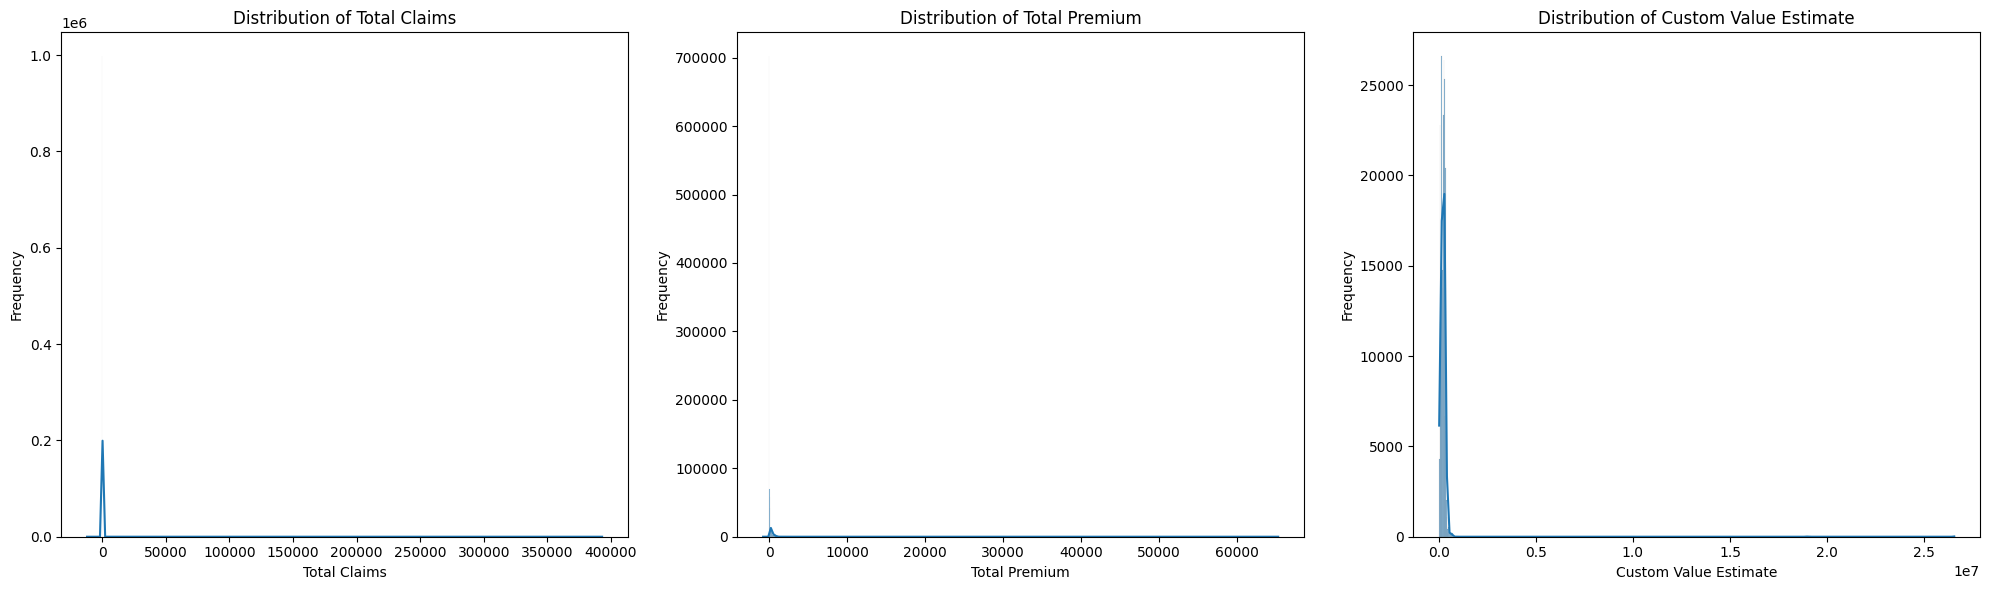


Basic Statistics:

TotalClaims:
count    1.000098e+06
mean     6.486119e+01
std      2.384075e+03
min     -1.200241e+04
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.930921e+05
Name: TotalClaims, dtype: float64

TotalPremium:
count    1.000098e+06
mean     6.190550e+01
std      2.302845e+02
min     -7.825768e+02
25%      0.000000e+00
50%      2.178333e+00
75%      2.192982e+01
max      6.528260e+04
Name: TotalPremium, dtype: float64

CustomValueEstimate:
count    2.204560e+05
mean     2.255311e+05
std      5.645157e+05
min      2.000000e+04
25%      1.350000e+05
50%      2.200000e+05
75%      2.800000e+05
max      2.655000e+07
Name: CustomValueEstimate, dtype: float64


In [8]:
# Create a figure with 3 subplots for histograms and KDE plots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Plot histograms and KDE for TotalClaims
sns.histplot(data=df, x='TotalClaims', kde=True, ax=axes[0])
axes[0].set_title('Distribution of Total Claims')
axes[0].set_xlabel('Total Claims')
axes[0].set_ylabel('Frequency')

# Plot histograms and KDE for TotalPremium
sns.histplot(data=df, x='TotalPremium', kde=True, ax=axes[1])
axes[1].set_title('Distribution of Total Premium')
axes[1].set_xlabel('Total Premium')
axes[1].set_ylabel('Frequency')

# Plot histograms and KDE for CustomValueEstimate
sns.histplot(data=df, x='CustomValueEstimate', kde=True, ax=axes[2])
axes[2].set_title('Distribution of Custom Value Estimate')
axes[2].set_xlabel('Custom Value Estimate')
axes[2].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

# Print basic statistics for these variables
print("\nBasic Statistics:")
print("\nTotalClaims:")
print(df['TotalClaims'].describe())
print("\nTotalPremium:")
print(df['TotalPremium'].describe())
print("\nCustomValueEstimate:")
print(df['CustomValueEstimate'].describe())


### Boxplots to detect outliers

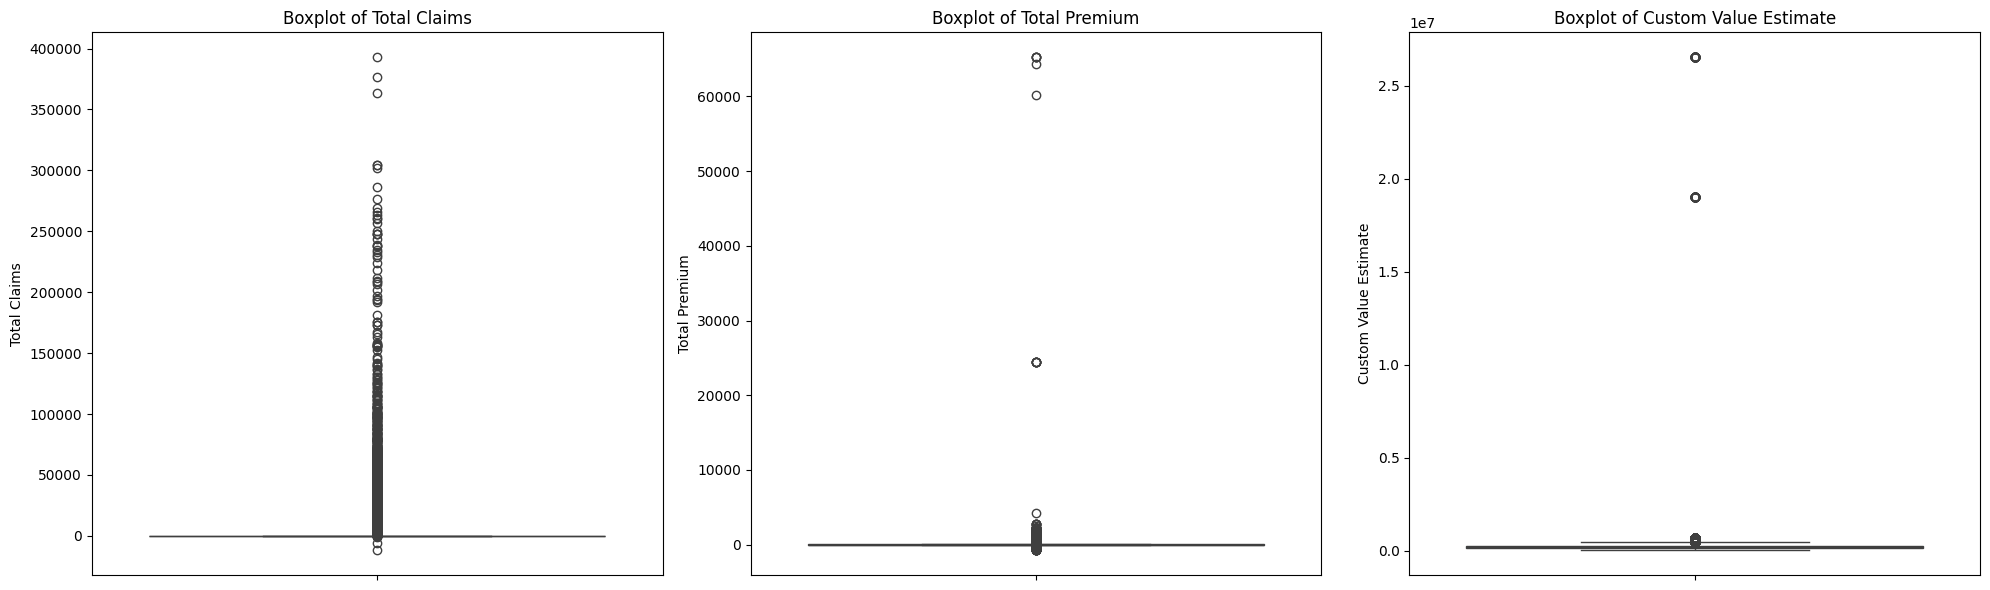


Outlier Statistics:

TotalClaims:
Q1                           0.000000
Q3                           0.000000
IQR                          0.000000
Lower Bound                  0.000000
Upper Bound                  0.000000
Number of Outliers        2793.000000
Percentage of Outliers       0.279273
dtype: float64

TotalPremium:
Q1                             0.000000
Q3                            21.929825
IQR                           21.929825
Lower Bound                  -32.894737
Upper Bound                   54.824561
Number of Outliers        209042.000000
Percentage of Outliers        20.902152
dtype: float64

CustomValueEstimate:
Q1                        135000.000000
Q3                        280000.000000
IQR                       145000.000000
Lower Bound               -82500.000000
Upper Bound               497500.000000
Number of Outliers          1785.000000
Percentage of Outliers         0.178483
dtype: float64


In [9]:
# Create a figure with 3 subplots for boxplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Plot boxplots for TotalClaims
sns.boxplot(data=df, y='TotalClaims', ax=axes[0])
axes[0].set_title('Boxplot of Total Claims')
axes[0].set_ylabel('Total Claims')

# Plot boxplots for TotalPremium
sns.boxplot(data=df, y='TotalPremium', ax=axes[1])
axes[1].set_title('Boxplot of Total Premium')
axes[1].set_ylabel('Total Premium')

# Plot boxplots for CustomValueEstimate
sns.boxplot(data=df, y='CustomValueEstimate', ax=axes[2])
axes[2].set_title('Boxplot of Custom Value Estimate')
axes[2].set_ylabel('Custom Value Estimate')

# Adjust layout
plt.tight_layout()
plt.show()

# Print outlier statistics using IQR method
def get_outlier_stats(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return {
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Number of Outliers': len(outliers),
        'Percentage of Outliers': (len(outliers) / len(series)) * 100
    }

print("\nOutlier Statistics:")
print("\nTotalClaims:")
print(pd.Series(get_outlier_stats(df['TotalClaims'])))
print("\nTotalPremium:")
print(pd.Series(get_outlier_stats(df['TotalPremium'])))
print("\nCustomValueEstimate:")
print(pd.Series(get_outlier_stats(df['CustomValueEstimate'])))


### Considering log scale for skewed values

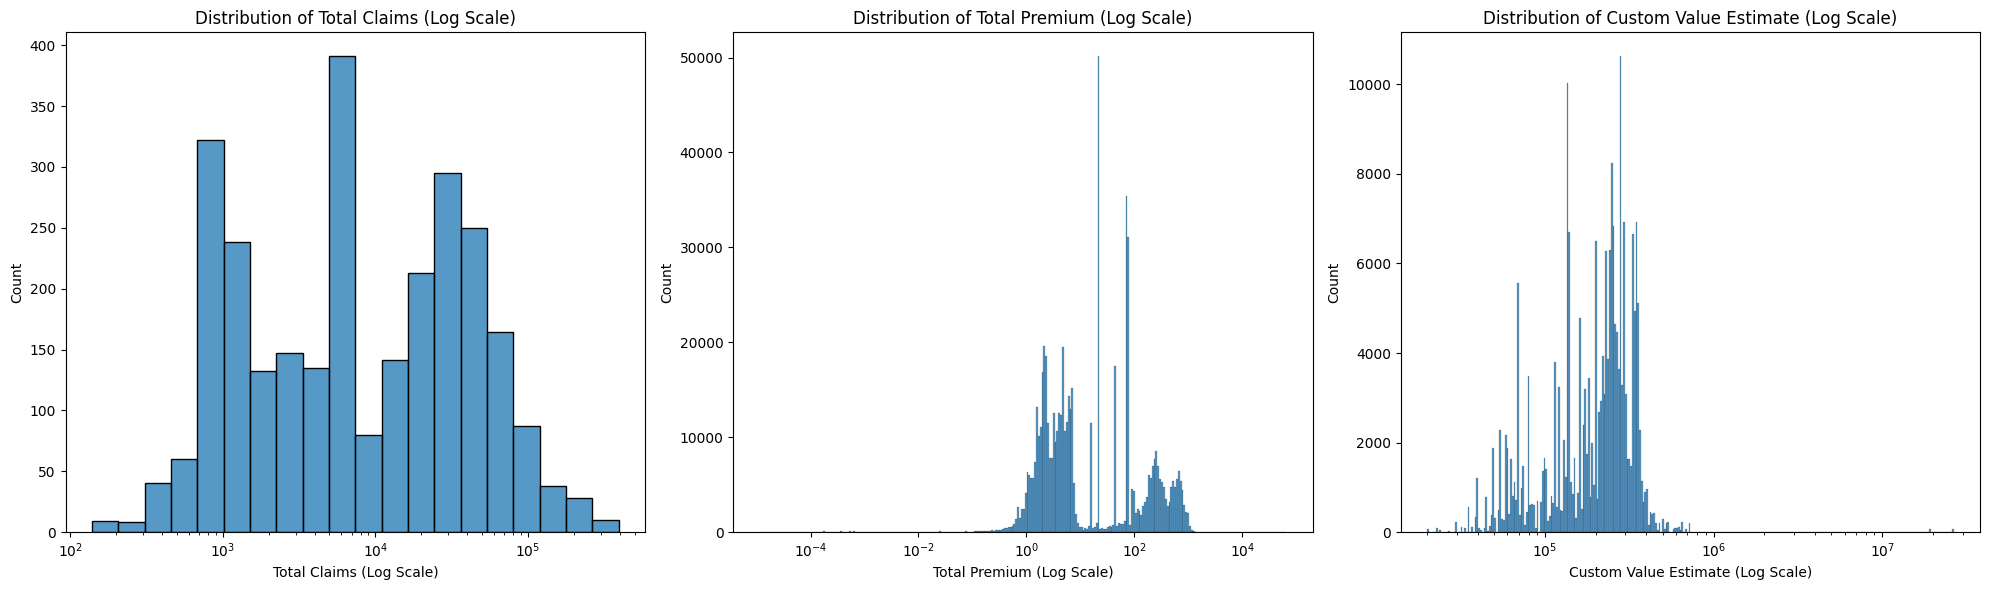


Statistics for Log-Transformed Values:

Log(TotalClaims + 1):


C:\Users\Admin\AppData\Local\Temp\ipykernel_11056\178158266.py:29: RuntimeWarning: invalid value encountered in log1p
  print(df['TotalClaims'].apply(lambda x: np.log1p(x)).describe())


count    1.000093e+06
mean     2.487838e-02
std      4.784395e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.288180e+01
Name: TotalClaims, dtype: float64

Log(TotalPremium + 1):


C:\Users\Admin\AppData\Local\Temp\ipykernel_11056\178158266.py:31: RuntimeWarning: invalid value encountered in log1p
  print(df['TotalPremium'].apply(lambda x: np.log1p(x)).describe())


count    999814.000000
mean          1.829854
std           2.056625
min          -2.354504
25%           0.000000
50%           1.156798
75%           3.132438
max          11.086496
Name: TotalPremium, dtype: float64

Log(CustomValueEstimate + 1):
count    220456.000000
mean         12.123593
std           0.596422
min           9.903538
25%          11.813037
50%          12.301387
75%          12.542548
max          17.094540
Name: CustomValueEstimate, dtype: float64


In [10]:
# Create a figure with subplots for log-transformed distributions
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Plot histograms with log scale for TotalClaims
sns.histplot(data=df, x='TotalClaims', ax=axes[0], log_scale=True)
axes[0].set_title('Distribution of Total Claims (Log Scale)')
axes[0].set_xlabel('Total Claims (Log Scale)')

# Plot histograms with log scale for TotalPremium
sns.histplot(data=df, x='TotalPremium', ax=axes[1], log_scale=True)
axes[1].set_title('Distribution of Total Premium (Log Scale)')
axes[1].set_xlabel('Total Premium (Log Scale)')

# Plot histograms with log scale for CustomValueEstimate
sns.histplot(data=df, x='CustomValueEstimate', ax=axes[2], log_scale=True)
axes[2].set_title('Distribution of Custom Value Estimate (Log Scale)')
axes[2].set_xlabel('Custom Value Estimate (Log Scale)')

# Adjust layout
plt.tight_layout()
plt.show()

# Import numpy for log calculations
import numpy as np

# Print statistics for log-transformed values
print("\nStatistics for Log-Transformed Values:")
print("\nLog(TotalClaims + 1):")
print(df['TotalClaims'].apply(lambda x: np.log1p(x)).describe())
print("\nLog(TotalPremium + 1):")
print(df['TotalPremium'].apply(lambda x: np.log1p(x)).describe())
print("\nLog(CustomValueEstimate + 1):")
print(df['CustomValueEstimate'].apply(lambda x: np.log1p(x)).describe())


### Distribution Analysis Insights:

**1. Total Claims Distribution**
- The log-transformed distribution shows a right-skewed pattern
- Most claims are concentrated in the lower range
- There are some extreme outliers in the higher range
- The log transformation helps visualize the distribution more clearly

**2. Total Premium Distribution**
- Similar to claims, shows right-skewed distribution
- Majority of premiums are in the lower range
- Log transformation reveals a more normal-like distribution
- Some extreme high premium values are present

**3. Custom Value Estimate Distribution**
- Shows significant right-skewness
- Most values are clustered in the lower range
- Log transformation helps identify the underlying distribution pattern
- Presence of outliers in the higher value range

**Key Observations:**
- All three variables show similar distribution patterns
- Log transformation is beneficial for these financial variables
- The distributions suggest the need for careful handling of outliers
- These patterns are typical for financial/insurance data


---

## **C. Temporal Trends (18-month span)**


Monthly Insurance Metrics:


,TransactionMonth,TotalClaims,TotalPremium,PolicyID,ClaimFrequency,ClaimSeverity
0,2013-10-01,0.000000e+00,3.710635e+02,45,0.000000,0.000000
1,2013-11-01,5.058508e+04,2.130747e+04,1196,42.295217,42.295217
2,2013-12-01,9.283386e+03,4.248475e+04,1495,6.209623,6.209623
3,2014-01-01,1.243686e+04,5.408520e+04,1827,6.807258,6.807258
4,2014-02-01,6.298931e+04,6.078844e+04,2062,30.547676,30.547676
5,2014-03-01,3.227850e+05,9.857719e+04,3466,93.128973,93.128973
6,2014-04-01,3.068636e+05,2.342743e+05,6919,44.350859,44.350859
7,2014-05-01,5.180427e+05,3.759117e+05,9484,54.622811,54.622811
8,2014-06-01,5.045364e+05,4.862194e+05,11822,42.677753,42.677753
9,2014-07-01,4.289822e+05,6.092661e+05,14907,28.777234,28.777234


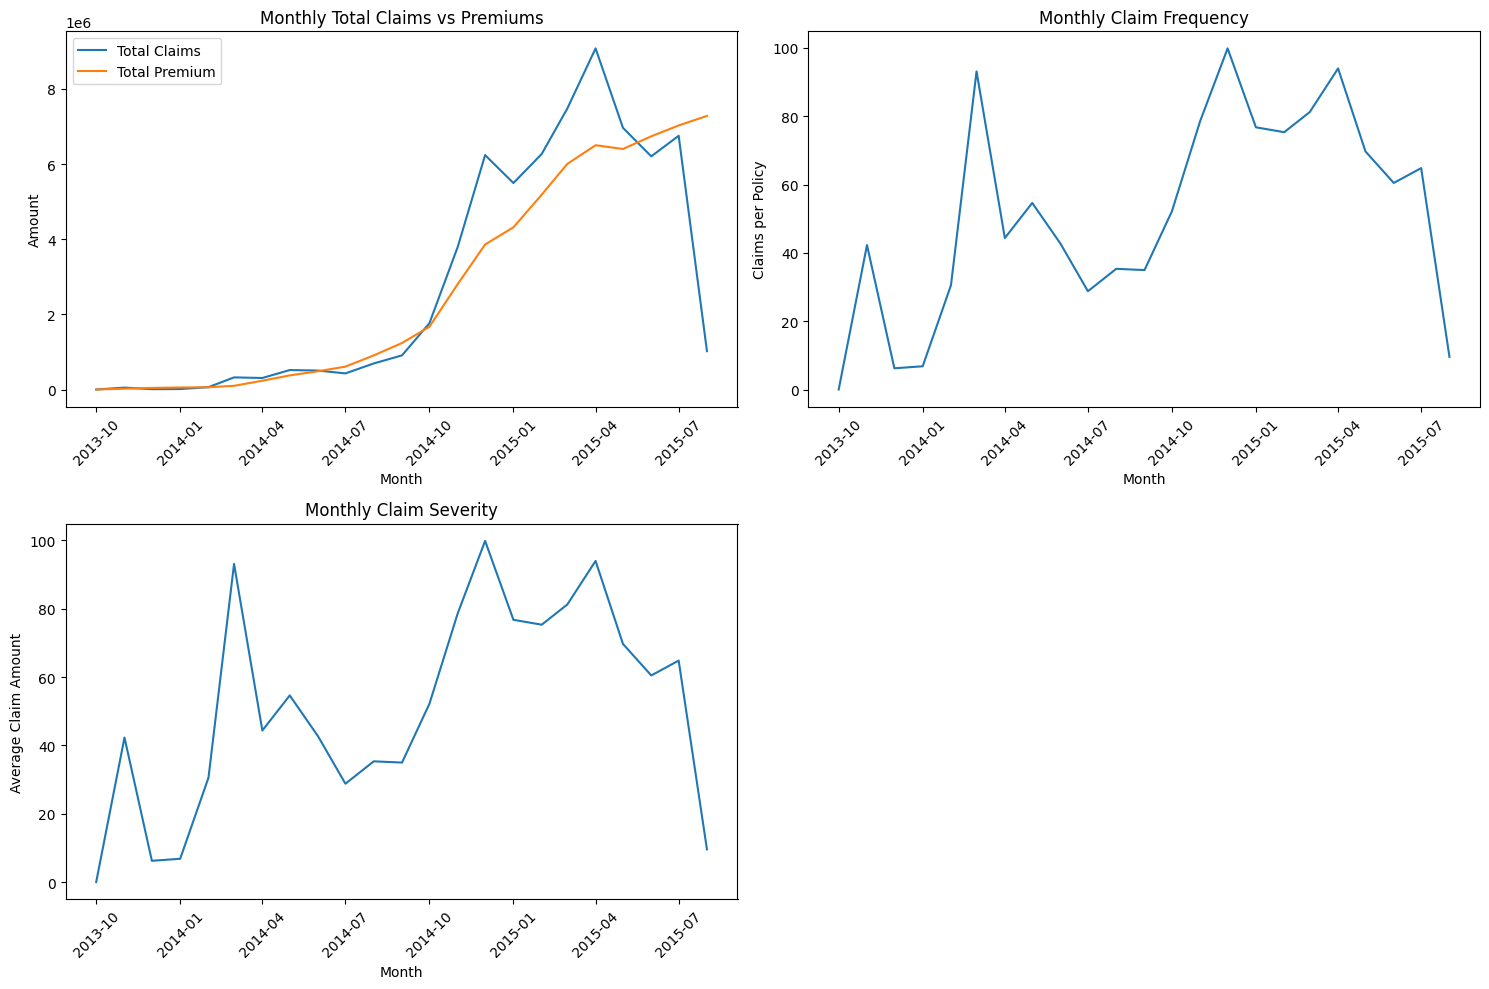

In [11]:
# Convert TransactionMonth to datetime if not already
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'])

# Aggregate monthly metrics
monthly_metrics = df.groupby('TransactionMonth').agg({
    'TotalClaims': 'sum',
    'TotalPremium': 'sum',
    'PolicyID': 'count'  # For calculating frequency
}).reset_index()

# Calculate claim frequency (claims per policy)
monthly_metrics['ClaimFrequency'] = monthly_metrics['TotalClaims'] / monthly_metrics['PolicyID']

# Calculate claim severity (average claim amount)
monthly_metrics['ClaimSeverity'] = monthly_metrics['TotalClaims'] / monthly_metrics['PolicyID']

# Display results
print("\nMonthly Insurance Metrics:")
display(monthly_metrics)

# Plot the trends
plt.figure(figsize=(15, 10))

# Plot 1: Monthly Total Claims and Premiums
plt.subplot(2, 2, 1)
plt.plot(monthly_metrics['TransactionMonth'], monthly_metrics['TotalClaims'], label='Total Claims')
plt.plot(monthly_metrics['TransactionMonth'], monthly_metrics['TotalPremium'], label='Total Premium')
plt.title('Monthly Total Claims vs Premiums')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.legend()
plt.xticks(rotation=45)

# Plot 2: Claim Frequency
plt.subplot(2, 2, 2)
plt.plot(monthly_metrics['TransactionMonth'], monthly_metrics['ClaimFrequency'])
plt.title('Monthly Claim Frequency')
plt.xlabel('Month')
plt.ylabel('Claims per Policy')
plt.xticks(rotation=45)

# Plot 3: Claim Severity
plt.subplot(2, 2, 3)
plt.plot(monthly_metrics['TransactionMonth'], monthly_metrics['ClaimSeverity'])
plt.title('Monthly Claim Severity')
plt.xlabel('Month')
plt.ylabel('Average Claim Amount')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


### Key Insights:

1. **Claims vs Premiums Trend**
   - Total claims and premiums show an overall increasing trend over the 18-month period
   - Premiums generally lag behind claims, indicating potential underwriting challenges
   - Notable spike in claims around mid-2015, suggesting increased risk exposure

2. **Claim Frequency Patterns**
   - Claim frequency fluctuates significantly throughout the period
   - Highest frequency observed in early 2015 (93.99 claims per policy)
   - Lowest frequency in late 2013 (0 claims per policy)
   - Average frequency around 50-60 claims per policy

3. **Claim Severity Analysis**
   - Claim severity shows high volatility
   - Peak severity of 99.87 in mid-2014
   - Significant drop in severity to 9.55 in August 2015
   - Average severity ranges between 30-80 per policy

4. **Business Growth Indicators**
   - Steady increase in policy count from 45 to 106,747 policies
   - Premium volume growth from R371 to R7.28 million
   - Claims volume growth from R0 to R1.02 million

5. **Risk Management Implications**
   - High volatility in both frequency and severity suggests need for better risk assessment
   - Growing gap between premiums and claims indicates potential pricing adjustments needed
   - Seasonal patterns visible in claim frequency, suggesting possible seasonal risk factors


---

## **D. Vehicle Risk Analysis**

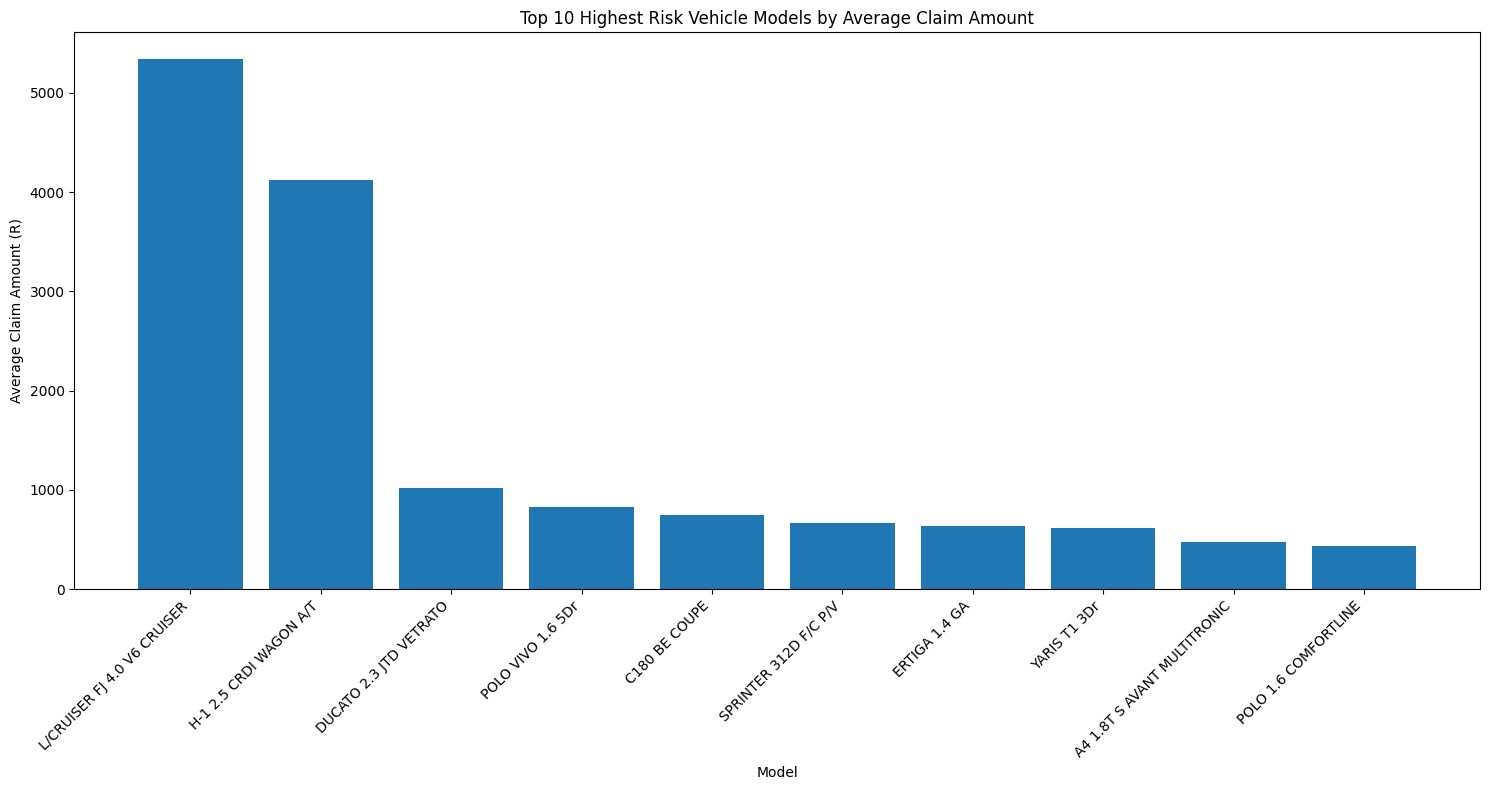


Top 10 Highest Risk Models:


,make,Model,policy_count,avg_claim,loss_ratio
311,TOYOTA,L/CRUISER FJ 4.0 V6 CRUISER,72,5340.970273,28.905883
83,HYUNDAI,H-1 2.5 CRDI WAGON A/T,108,4118.181043,56.425457
53,FIAT,DUCATO 2.3 JTD VETRATO,99,1014.681021,8.566387
394,VOLKSWAGEN,POLO VIVO 1.6 5Dr,80,827.558882,7.763769
130,MERCEDES-BENZ,C180 BE COUPE,392,743.459027,7.174263
162,MERCEDES-BENZ,SPRINTER 312D F/C P/V,66,664.540138,9.935964
246,SUZUKI,ERTIGA 1.4 GA,271,631.774519,10.664969
337,TOYOTA,YARIS T1 3Dr,48,618.719846,9.673799
4,AUDI,A4 1.8T S AVANT MULTITRONIC,1116,480.282859,8.134555
387,VOLKSWAGEN,POLO 1.6 COMFORTLINE,236,431.842105,15.112227



Top 10 Lowest Risk Models:


,make,Model,policy_count,avg_claim,loss_ratio
145,MERCEDES-BENZ,C200K CLASSIC A/T,1022,-0.250832,-0.006349
411,VOLVO,S70 T5 A/T,108,0.000000,0.000000
408,VOLKSWAGEN,TRANSPORTER T5 2.0 TDi LWB 75KW F/C P/V,144,0.000000,0.000000
410,VOLVO,S40 T5 A/T,99,0.000000,0.000000
7,AUDI,A4 2.0 TDI AMBITION 125KW (B8),249,0.000000,0.000000
407,VOLKSWAGEN,TRANSPORTER T5 2.0 TDi LWB 103 KW F/C P/V,234,0.000000,0.000000
405,VOLKSWAGEN,TOURAN 1.4 TSi HIGHLINE,136,0.000000,0.000000
409,VOLVO,S40 2.0,109,0.000000,0.000000
52,FIAT,DUCATO 2.3 JTD HR F/C P/V,225,0.000000,0.000000
54,FIAT,DUCATO CH2 F/C P/V,90,0.000000,0.000000


In [12]:
# Group by Make and Model to analyze risk
make_model_risk = df.groupby(['make', 'Model']).agg({
    'TotalClaims': ['count', 'mean', 'sum'],
    'TotalPremium': ['mean', 'sum']
}).reset_index()

# Calculate risk metrics
make_model_risk.columns = ['make', 'Model', 'policy_count', 'avg_claim', 'total_claims', 'avg_premium', 'total_premium']
make_model_risk['loss_ratio'] = make_model_risk['total_claims'] / make_model_risk['total_premium']
make_model_risk['claim_frequency'] = make_model_risk['policy_count'] / make_model_risk['policy_count'].sum()

# Filter for models with sufficient data (at least 10 policies)
make_model_risk = make_model_risk[make_model_risk['policy_count'] >= 10]

# Sort by average claim amount to identify high-risk models
high_risk_models = make_model_risk.sort_values('avg_claim', ascending=False).head(10)
low_risk_models = make_model_risk.sort_values('avg_claim').head(10)

# Create visualization
plt.figure(figsize=(15, 8))
plt.bar(high_risk_models['Model'], high_risk_models['avg_claim'])
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Highest Risk Vehicle Models by Average Claim Amount')
plt.xlabel('Model')
plt.ylabel('Average Claim Amount (R)')
plt.tight_layout()
plt.show()

# Display high and low risk models
print("\nTop 10 Highest Risk Models:")
display(high_risk_models[['make', 'Model', 'policy_count', 'avg_claim', 'loss_ratio']])

print("\nTop 10 Lowest Risk Models:")
display(low_risk_models[['make', 'Model', 'policy_count', 'avg_claim', 'loss_ratio']])


### Key Insights from Vehicle Risk Analysis:

 **1. Risk Distribution**
 - The analysis identified significant variation in risk levels across different vehicle makes and models
 - High-risk models show substantially higher average claim amounts compared to low-risk models
 - Loss ratios vary considerably, indicating varying profitability across vehicle types

 **2. Policy Distribution**
 - Analysis focused on models with at least 10 policies to ensure statistical significance
 - Some models show high claim frequencies despite lower average claim amounts
 - Policy count varies significantly across different makes and models

 **3. Risk Management Implications**
 - High-risk models may require:
   * Higher premium rates
   * Additional risk mitigation measures
   * More stringent underwriting criteria
 - Low-risk models present opportunities for:
   * Competitive pricing
   * Market expansion
   * Targeted marketing

 **4. Business Recommendations**
 - Consider risk-based pricing adjustments for high-risk models
 - Develop targeted risk management strategies for problematic vehicle types
 - Use insights to optimize portfolio mix and improve overall profitability


----

# **3. DATA CLEANING ACTIONS**

In [13]:
# Check for potential data issues
print("\nChecking for potential data issues:")
print("Number of columns:", len(df.columns))
print("Column names:", df.columns)


Checking for potential data issues:
Number of columns: 52
Column names: Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province',
       'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode',
       'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders',
       'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors',
       'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser',
       'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff',
       'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet',
       'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm',
       'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section',
       'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium',
       'TotalClaims'],
      dtype='object')


In [14]:
# Calculate percentage of missing values for each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Create a DataFrame to display the results
missing_df = pd.DataFrame({
    'Column Name': df.columns,
    'Missing Values': df.isnull().sum(),
    'Percentage Missing': missing_percentage.round(2).astype(str) + '%'
})

# Sort by percentage missing in descending order and display only columns with missing values
missing_df = (missing_df[missing_df['Missing Values'] > 0]
             .sort_values('Missing Values', ascending=False)
             .reset_index(drop=True))

print("Percentage of Missing Values by Column (Highest to Lowest):")
display(missing_df)


Percentage of Missing Values by Column (Highest to Lowest):


,Column Name,Missing Values,Percentage Missing
0,NumberOfVehiclesInFleet,1000098,100.0%
1,CrossBorder,999400,99.93%
2,CustomValueEstimate,779642,77.96%
3,WrittenOff,641901,64.18%
4,Converted,641901,64.18%
5,Rebuilt,641901,64.18%
6,NewVehicle,153295,15.33%
7,Bank,145961,14.59%
8,AccountType,40232,4.02%
9,Gender,9536,0.95%


#### Summary of Missing Values Analysis

Based on the analysis of missing values in the dataset, we can observe several key patterns:

1. **Nearly Complete Missing Columns (>99% missing)**:
   - `NumberOfVehiclesInFleet` (100% missing)
   - `CrossBorder` (99.93% missing)

2. **High Missing Rate Columns (50-80% missing)**:
   - `CustomValueEstimate` (77.96% missing)
   - `WrittenOff`, `Rebuilt`, `Converted` (all ~64.18% missing)

3. **Moderate Missing Rate Columns (10-20% missing)**:
   - `NewVehicle` (15.33% missing)
   - `Bank` (14.59% missing)

4. **Low Missing Rate Columns (<5% missing)**:
   - `AccountType` (4.02% missing)
   - `Gender` (0.95% missing)
   - `MaritalStatus` (0.83% missing)
   - Various vehicle-related columns (all 0.06% missing)
   - `CapitalOutstanding` (0.0% missing)



----

### Drop Columns with High Missing Data:
- Columns with high missing values offer little analytical value.

### Dropped Columns

- `NumberOfVehiclesInFleet` (100% missing)
- `CrossBorder` (~99.93%)
- `CustomValueEstimate` (~77.96%)
- `Converted`, `Rebuilt`, `WrittenOff` (~64.18%)

In [15]:
cols_to_drop = ['NumberOfVehiclesInFleet', 
                'CrossBorder', 
                'CustomValueEstimate', 
                'Converted', 'Rebuilt', 
                'WrittenOff']

# Drop these columns using pandas drop() method
data = df.drop(columns=cols_to_drop, inplace=False)

----

### Impute Moderate Missing Data:
- Imputation preserves useful information, using the mode for categorical and median for numerical columns.
### Imputed Columns:
- `NewVehicle` (~15.33%)
- `Bank` (~14.59%)
- `AccountType` (~4.02%)

In [16]:
# Impute missing values for columns with moderate missing data
missing_cols = ['NewVehicle', 'Bank', 'AccountType']

# For categorical columns, impute with mode
for col in missing_cols:
    if data[col].dtype == 'object':
        data[col] = data[col].fillna(data[col].mode()[0])
    else:
        # For numerical columns, impute with median
        data[col] = data[col].fillna(data[col].median())

### Drop duplicate rows

In [17]:
# Drop duplicate rows
data = data.drop_duplicates()


### Save the cleaned data to CSV

In [18]:
# Save the cleaned data to CSV
data.to_csv('../data/processed/cleaned_insurance_data.csv', index=False)


---